<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Sentiment_Analysis/PrreProcess_ABSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA = pd.read_csv('Amazon Reviews_1_10000.csv')

#***INFORMATION ABOUT DATASET***

In [3]:
DATA.head()

,default_header,review_body,label
0,1,One of the best game music soundtracks - for a...,1
1,10001,Best purchase ever!!!!: We bought this exersau...,1
2,20001,"This book was slow, and weak.: Not one of his ...",0
3,30001,"A must-read for every southern lady, failed or...",1
4,40001,Horrible: Watch Napoleon if you want funny. Th...,0


In [4]:
DATA.columns = ['No.', 'Review_Text', 'Sentiment_Label']  # ]column titles
DATA.to_csv('amazon_reviews.csv', index=False)

In [5]:
DATA = pd.read_csv('amazon_reviews.csv')

In [6]:
DATA.count()

,0
No.,1367
Review_Text,1367
Sentiment_Label,1367


In [7]:
DATA.shape

(1367, 3)

In [8]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No.              1367 non-null   int64 
 1   Review_Text      1367 non-null   object
 2   Sentiment_Label  1367 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.2+ KB


In [9]:
DATA.describe()

,No.,Sentiment_Label
count,1.367000e+03,1367.000000
mean,6.942951e+06,0.693489
std,4.091549e+06,0.461213
min,1.000000e+00,0.000000
25%,3.415001e+06,0.000000
50%,6.830001e+06,1.000000
75%,1.057786e+07,1.000000
max,1.407796e+07,1.000000


In [10]:
DATA.head(10)

,No.,Review_Text,Sentiment_Label
0,1,One of the best game music soundtracks - for a...,1
1,10001,Best purchase ever!!!!: We bought this exersau...,1
2,20001,"This book was slow, and weak.: Not one of his ...",0
3,30001,"A must-read for every southern lady, failed or...",1
4,40001,Horrible: Watch Napoleon if you want funny. Th...,0
5,50001,Toast crashes: I cannot get Toast 7 to compres...,0
6,60001,"It's simple,but it's great: It's one of the mo...",1
7,70001,Dont waste your money. Or hold your breath.: D...,0
8,80001,What's with the cat?: Since Patsy and I both w...,0
9,90001,Dirk Pitt is not Believeable: The biggest disa...,0


#***DATA VISUALIZATION***

####Distribution of Sentiment Labels

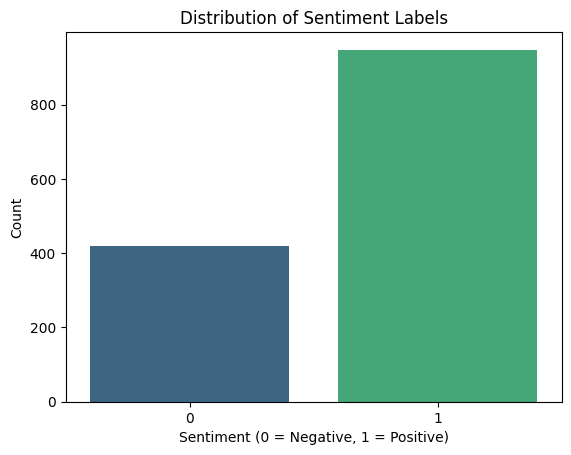

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=DATA, x="Sentiment_Label", palette="viridis")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


####Word Cloud of Reviews

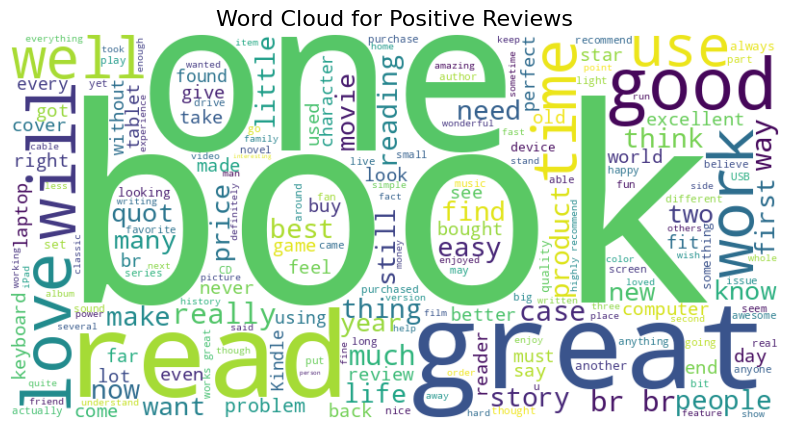

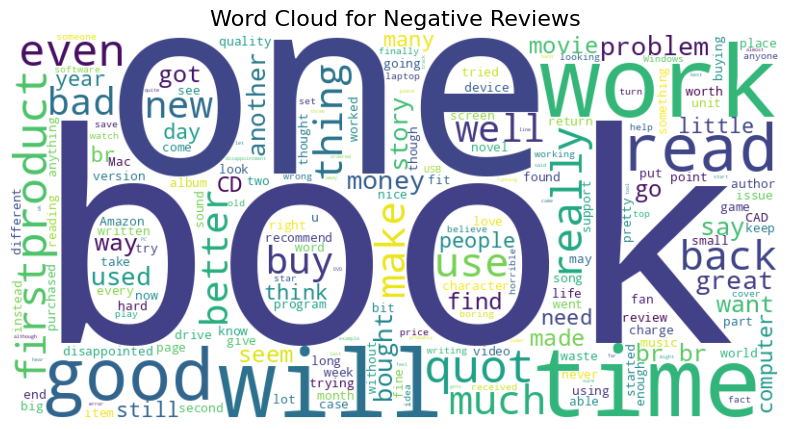

In [12]:
from wordcloud import WordCloud

# Function to create word clouds by sentiment
def generate_word_cloud(data, label, title):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Word cloud for positive reviews
generate_word_cloud(DATA, label=1, title="Word Cloud for Positive Reviews")

# Word cloud for negative reviews
generate_word_cloud(DATA, label=0, title="Word Cloud for Negative Reviews")


####Review Length Distribution

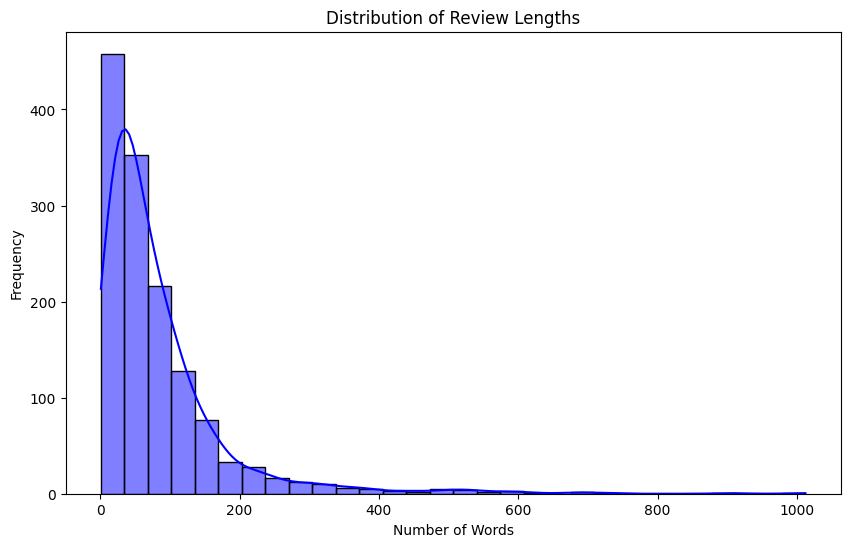

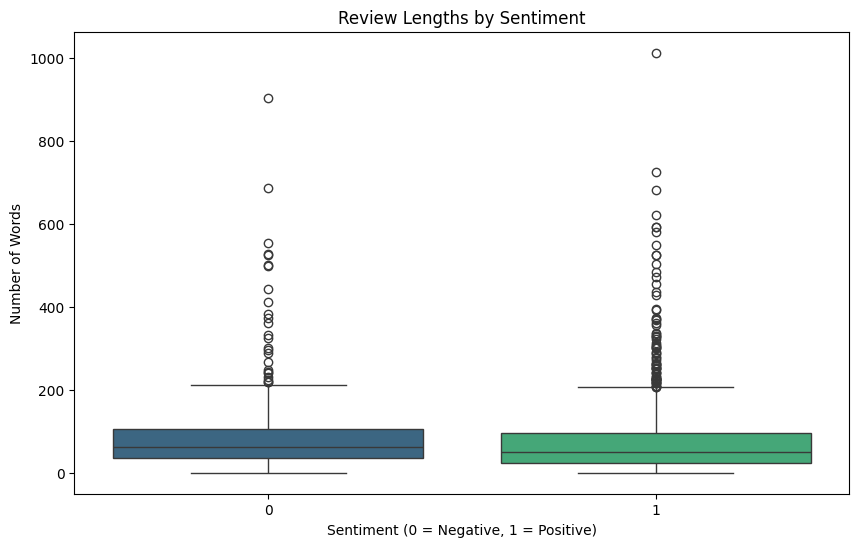

In [13]:
# Add a column for review lengths
DATA["review_length"] = DATA["Review_Text"].dropna().apply(lambda x: len(x.split()))

# Histogram of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(DATA["review_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Box plot comparing review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=DATA, x="Sentiment_Label", y="review_length", palette="viridis")
plt.title("Review Lengths by Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Words")
plt.show()


####Top Words by Sentiment

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


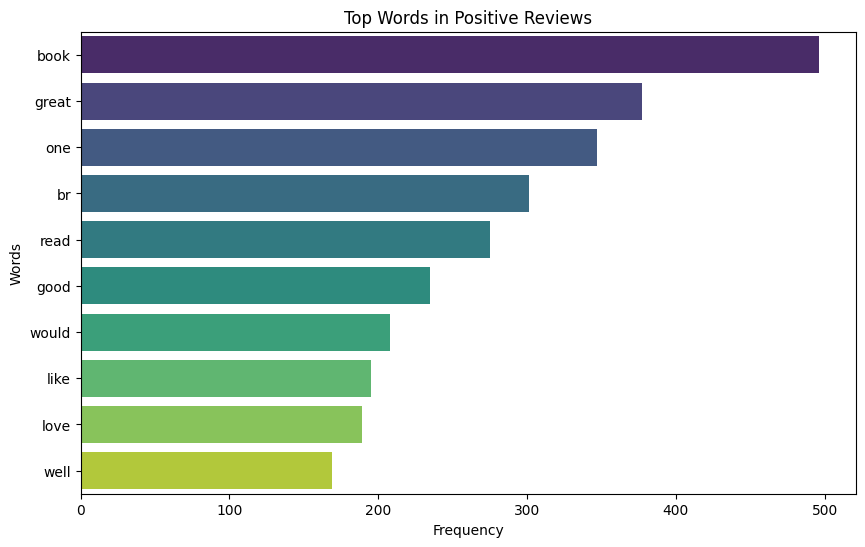

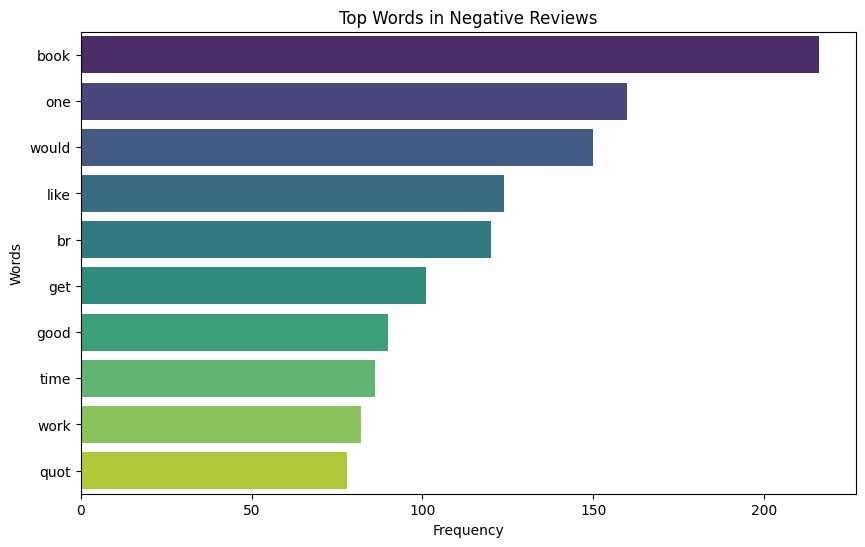

In [14]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already done
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

# Function to get top words for a sentiment
def get_top_words(data, label, n=10):
    text = " ".join(data[data["Sentiment_Label"] == label]["Review_Text"].dropna())
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    return Counter(words).most_common(n)

# Get top words for positive and negative reviews
top_positive = get_top_words(DATA, label=1)
top_negative = get_top_words(DATA, label=0)

# Plot top words
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(top_positive, "Top Words in Positive Reviews")
plot_top_words(top_negative, "Top Words in Negative Reviews")


####Common N-grams

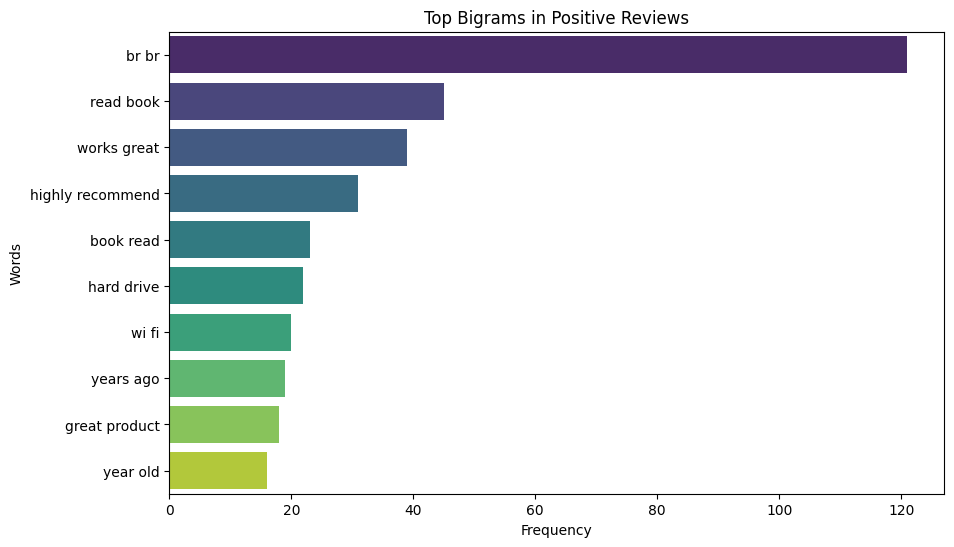

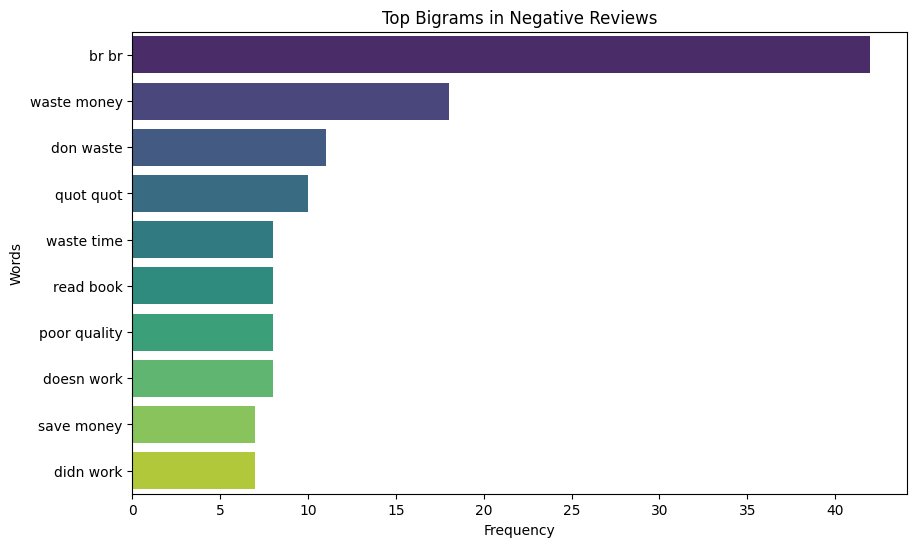

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_top_ngrams(data, label, ngram_range=(2, 2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    text = data[data["Sentiment_Label"] == label]["Review_Text"].dropna()
    X = vectorizer.fit_transform(text)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_counts = sorted(zip(ngram_counts, ngram_features), reverse=True)[:n]
    return [(feature, count) for count, feature in ngram_counts]

# Get top bigrams for positive and negative reviews
top_positive_ngrams = get_top_ngrams(DATA, label=1)
top_negative_ngrams = get_top_ngrams(DATA, label=0)

# Plot top n-grams
plot_top_words(top_positive_ngrams, "Top Bigrams in Positive Reviews")
plot_top_words(top_negative_ngrams, "Top Bigrams in Negative Reviews")

# ***DATA PRE-PROCESSING***

###Handling missing values

In [16]:
DATA.isnull().sum()

,0
No.,0
Review_Text,0
Sentiment_Label,0
review_length,0


In [17]:
DATA['Review_Text'] = DATA.Review_Text.fillna(' ')
DATA['review_length'] = DATA.Review_Text.fillna(' ')

In [18]:
DATA.isnull().sum()

,0
No.,0
Review_Text,0
Sentiment_Label,0
review_length,0


###Handling duplicate values

In [19]:
Duplicates = DATA.duplicated().sum()
print(Duplicates)

0


###Text processing

In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####Convert text to lowercase

In [21]:
DATA['Review_Text'].head()

,Review_Text
0,One of the best game music soundtracks - for a...
1,Best purchase ever!!!!: We bought this exersau...
2,"This book was slow, and weak.: Not one of his ..."
3,"A must-read for every southern lady, failed or..."
4,Horrible: Watch Napoleon if you want funny. Th...


In [22]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [23]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks - for a...
1,best purchase ever!!!!: we bought this exersau...
2,"this book was slow, and weak.: not one of his ..."
3,"a must-read for every southern lady, failed or..."
4,horrible: watch napoleon if you want funny. th...


#### Remove links

In [24]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuations

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
DATA['Review_Text'].tail()

,Review_Text
1362,i have only praise for this mouse! but beware ...
1363,i tried to replace a usb 1 port with this. it ...
1364,"as a school reading specialist, i was excited ..."
1365,"sadly i had the same problem with my drive, af..."
1366,my boss needed a new mouse that was more respo...


In [27]:
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

DATA['Review_Text'] = DATA['Review_Text'].apply(remove_punctuation)

In [28]:
DATA['Review_Text'].head()

,Review_Text
0,one of the best game music soundtracks for a ...
1,best purchase ever we bought this exersaucer w...
2,this book was slow and weak not one of his bes...
3,a mustread for every southern lady failed or n...
4,horrible watch napoleon if you want funny this...


#### Remove special characters and numbers

In [29]:
DATA['Review_Text'].tail(5)

,Review_Text
1362,i have only praise for this mouse but beware ...
1363,i tried to replace a usb 1 port with this it w...
1364,as a school reading specialist i was excited a...
1365,sadly i had the same problem with my drive aft...
1366,my boss needed a new mouse that was more respo...


In [30]:
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [31]:
DATA['Review_Text'].tail()

,Review_Text
1362,i have only praise for this mouse but beware ...
1363,i tried to replace a usb port with this it wa...
1364,as a school reading specialist i was excited a...
1365,sadly i had the same problem with my drive aft...
1366,my boss needed a new mouse that was more respo...


#### Remove Stopwords

In [32]:
DATA['Review_Text'].tail()

,Review_Text
1362,i have only praise for this mouse but beware ...
1363,i tried to replace a usb port with this it wa...
1364,as a school reading specialist i was excited a...
1365,sadly i had the same problem with my drive aft...
1366,my boss needed a new mouse that was more respo...


In [33]:
stop_words = stopwords.words('english')
DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [34]:
DATA['Review_Text'].tail()

,Review_Text
1362,praise mouse beware drop damage beyond repair ...
1363,tried replace usb port wasnt picked xp install...
1364,school reading specialist excited product woul...
1365,sadly problem drive year suddenly isnt recogni...
1366,boss needed new mouse responsive accurate boug...


#### Stemming

In [35]:
DATA['Review_Text'].head(20)

,Review_Text
0,one best game music soundtracks game didnt rea...
1,best purchase ever bought exersaucer little gu...
2,book slow weak one beststhank god slow weak bo...
3,mustread every southern lady failed love book ...
4,horrible watch napoleon want funny movie sucks...
5,toast crashes cannot get toast compress ats fi...
6,simplebut great one entertaining war games eve...
7,dont waste money hold breath give half stars d...
8,whats cat since patsy went davidson college th...
9,dirk pitt believeable biggest disappointment n...


In [36]:
#ps = PorterStemmer()
#DATA['Review_Text'] = DATA['Review_Text'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [37]:
DATA['Review_Text'].head(20)

,Review_Text
0,one best game music soundtracks game didnt rea...
1,best purchase ever bought exersaucer little gu...
2,book slow weak one beststhank god slow weak bo...
3,mustread every southern lady failed love book ...
4,horrible watch napoleon want funny movie sucks...
5,toast crashes cannot get toast compress ats fi...
6,simplebut great one entertaining war games eve...
7,dont waste money hold breath give half stars d...
8,whats cat since patsy went davidson college th...
9,dirk pitt believeable biggest disappointment n...


#### Tokenization

In [38]:
DATA['tokens'] = DATA['Review_Text'].apply(nltk.word_tokenize)

In [39]:
#stop_words = set(stopwords.words('english'))
DATA['tokens'] = DATA['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#### Lemmatization

In [40]:
DATA['Review_Text'].head(10)

,Review_Text
0,one best game music soundtracks game didnt rea...
1,best purchase ever bought exersaucer little gu...
2,book slow weak one beststhank god slow weak bo...
3,mustread every southern lady failed love book ...
4,horrible watch napoleon want funny movie sucks...
5,toast crashes cannot get toast compress ats fi...
6,simplebut great one entertaining war games eve...
7,dont waste money hold breath give half stars d...
8,whats cat since patsy went davidson college th...
9,dirk pitt believeable biggest disappointment n...


In [41]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
DATA['tokens'] = DATA['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
DATA['tokens'].head(10)

,tokens
0,"[one, best, game, music, soundtrack, game, did..."
1,"[best, purchase, ever, bought, exersaucer, lit..."
2,"[book, slow, weak, one, beststhank, god, slow,..."
3,"[mustread, every, southern, lady, failed, love..."
4,"[horrible, watch, napoleon, want, funny, movie..."
5,"[toast, crash, get, toast, compress, at, file,..."
6,"[simplebut, great, one, entertaining, war, gam..."
7,"[dont, waste, money, hold, breath, give, half,..."
8,"[whats, cat, since, patsy, went, davidson, col..."
9,"[dirk, pitt, believeable, biggest, disappointm..."


#### Finalize

In [43]:
# Filter short reviews (length < 3 words)
DATA['review_length'] = DATA['tokens'].apply(len)
DATA = DATA[DATA['review_length'] >= 3]

# Feature engineering: Join tokens back into sentences
DATA['Cleaned_review'] = DATA['tokens'].apply(lambda x: ' '.join(x))

In [44]:
DATA.head()

,No.,Review_Text,Sentiment_Label,review_length,tokens,Cleaned_review
0,1,one best game music soundtracks game didnt rea...,1,79,"[one, best, game, music, soundtrack, game, did...",one best game music soundtrack game didnt real...
1,10001,best purchase ever bought exersaucer little gu...,1,39,"[best, purchase, ever, bought, exersaucer, lit...",best purchase ever bought exersaucer little gu...
2,20001,book slow weak one beststhank god slow weak bo...,0,20,"[book, slow, weak, one, beststhank, god, slow,...",book slow weak one beststhank god slow weak bo...
3,30001,mustread every southern lady failed love book ...,1,49,"[mustread, every, southern, lady, failed, love...",mustread every southern lady failed love book ...
4,40001,horrible watch napoleon want funny movie sucks...,0,32,"[horrible, watch, napoleon, want, funny, movie...",horrible watch napoleon want funny movie suck ...


# ***Save Dataset***

In [45]:
# Save processed dataset
DATA.to_csv("ABSA_dataset.csv", index=False)

In [46]:
output = pd.read_csv("ABSA_dataset.csv")
output.head()

,No.,Review_Text,Sentiment_Label,review_length,tokens,Cleaned_review
0,1,one best game music soundtracks game didnt rea...,1,79,"['one', 'best', 'game', 'music', 'soundtrack',...",one best game music soundtrack game didnt real...
1,10001,best purchase ever bought exersaucer little gu...,1,39,"['best', 'purchase', 'ever', 'bought', 'exersa...",best purchase ever bought exersaucer little gu...
2,20001,book slow weak one beststhank god slow weak bo...,0,20,"['book', 'slow', 'weak', 'one', 'beststhank', ...",book slow weak one beststhank god slow weak bo...
3,30001,mustread every southern lady failed love book ...,1,49,"['mustread', 'every', 'southern', 'lady', 'fai...",mustread every southern lady failed love book ...
4,40001,horrible watch napoleon want funny movie sucks...,0,32,"['horrible', 'watch', 'napoleon', 'want', 'fun...",horrible watch napoleon want funny movie suck ...
